In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv('Train.csv', delimiter=',')
test=pd.read_csv('Test.csv', delimiter=',')
submission=pd.read_csv('SampleSubmission.csv', delimiter=',')

In [3]:
train.head(10)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,010Q650 X 2020-01-07,2020-01-07,010Q650,28.0,10.0,52.0,1053.22,94,14.600000,42.200001,...,30.605176,-62.134264,23.419991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,010Q650 X 2020-01-08,2020-01-08,010Q650,21.0,6.0,51.0,1239.66,96,15.600000,47.100002,...,60.866484,-71.908414,32.348835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,010Q650 X 2020-01-09,2020-01-09,010Q650,18.0,6.0,28.0,307.93,93,18.600000,62.400002,...,59.674296,-60.765053,26.396956,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,010Q650 X 2020-01-10,2020-01-10,010Q650,21.0,15.0,33.0,305.92,95,11.800000,39.000000,...,37.176703,-73.812750,31.707143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,010Q650 X 2020-01-11,2020-01-11,010Q650,24.0,16.0,32.0,279.19,85,10.396144,33.100002,...,10.016394,-68.586306,28.090359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
test.head(2)

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,...,1.445658,-95.984984,22.942019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,...,34.641758,-95.014908,18.539116,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
train.shape

(30557, 82)

In [6]:
train.head(1) 

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.5,92,11.0,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118


In [7]:
traind=train.dropna(thresh=50)
#traind.isna().sum().sort_values(ascending=False).head(30)

In [8]:
'''
Removing outliers in our dataset
'''
def outlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (iqr * 1.5)
    higher = q3 + (iqr * 1.5)
    true_index=(data < lower) | (data > higher)
    false_index=~true_index
    data[false_index]=np.mean(data[true_index])

In [9]:
outlier(train.L3_NO2_NO2_slant_column_number_density)
outlier(traind.L3_NO2_NO2_column_number_density)
outlier(traind.L3_NO2_NO2_slant_column_number_density)
outlier(traind.L3_NO2_absorbing_aerosol_index)
outlier(traind.L3_NO2_cloud_fraction)
outlier(traind.L3_NO2_sensor_altitude) 
outlier(traind.L3_NO2_sensor_azimuth_angle)
outlier(traind.L3_NO2_sensor_zenith_angle)
outlier(traind.L3_NO2_solar_azimuth_angle)
outlier(traind.L3_NO2_solar_zenith_angle)
outlier(traind.L3_NO2_stratospheric_NO2_column_number_density)
outlier(traind.L3_NO2_tropopause_pressure)
outlier(traind.L3_NO2_tropospheric_NO2_column_number_density)
outlier(traind.L3_O3_O3_column_number_density)
outlier(traind.L3_O3_O3_effective_temperature)
outlier(traind.L3_O3_cloud_fraction)
outlier(traind.L3_O3_sensor_azimuth_angle)
outlier(traind.L3_O3_sensor_zenith_angle)
outlier(traind.L3_O3_solar_azimuth_angle)
outlier(traind.L3_O3_solar_zenith_angle)
outlier(traind.L3_CO_CO_column_number_density)
outlier(traind.L3_CO_H2O_column_number_density)
outlier(traind.L3_CO_cloud_height)
outlier(traind.L3_CO_sensor_altitude)
outlier(traind.L3_CO_sensor_azimuth_angle)
outlier(traind.L3_CO_sensor_zenith_angle)
outlier(traind.L3_CO_solar_azimuth_angle)
outlier(traind.L3_CO_solar_zenith_angle)
outlier(traind.L3_HCHO_HCHO_slant_column_number_density)
outlier(traind.L3_HCHO_cloud_fraction)
outlier(traind.L3_HCHO_sensor_azimuth_angle)
outlier(traind.L3_HCHO_sensor_zenith_angle)
outlier(traind.L3_HCHO_solar_azimuth_angle)
outlier(traind.L3_HCHO_solar_zenith_angle)
outlier(traind.L3_HCHO_tropospheric_HCHO_column_number_density)
outlier(traind.L3_HCHO_tropospheric_HCHO_column_number_density_amf)
outlier(traind.L3_CLOUD_cloud_base_height)
outlier(traind.L3_CLOUD_cloud_base_pressure)
outlier(traind.L3_CLOUD_cloud_fraction)
outlier(traind.L3_CLOUD_cloud_optical_depth)
outlier(traind.L3_CLOUD_cloud_top_height)
outlier(traind.L3_CLOUD_cloud_top_pressure)
outlier(traind.L3_CLOUD_sensor_azimuth_angle)
outlier(traind.L3_CLOUD_sensor_zenith_angle)
outlier(traind.L3_CLOUD_solar_azimuth_angle)
outlier(traind.L3_CLOUD_solar_zenith_angle)
outlier(traind.L3_CLOUD_surface_albedo)
outlier(traind.L3_AER_AI_absorbing_aerosol_index)
outlier(traind.L3_AER_AI_sensor_altitude)
outlier(traind.L3_AER_AI_sensor_azimuth_angle)
outlier(traind.L3_AER_AI_sensor_zenith_angle)
outlier(traind.L3_AER_AI_solar_azimuth_angle)
outlier(traind.L3_AER_AI_solar_zenith_angle)
outlier(traind.L3_SO2_SO2_column_number_density)
outlier(traind.L3_SO2_SO2_column_number_density_amf)
outlier(traind.L3_SO2_SO2_slant_column_number_density)
outlier(traind.L3_SO2_absorbing_aerosol_index)
outlier(traind.L3_SO2_cloud_fraction)
outlier(traind.L3_SO2_sensor_azimuth_angle)
outlier(traind.L3_SO2_sensor_zenith_angle)
outlier(traind.L3_SO2_solar_azimuth_angle)
outlier(traind.L3_SO2_solar_zenith_angle)

In [10]:
traind.isna().sum().sort_values(ascending=False).head(20)

L3_CLOUD_sensor_azimuth_angle     26982
L3_AER_AI_sensor_azimuth_angle    26982
L3_CLOUD_sensor_zenith_angle      26982
L3_O3_cloud_fraction              26982
L3_CLOUD_cloud_fraction           26982
L3_NO2_cloud_fraction             26982
L3_NO2_sensor_azimuth_angle       26982
L3_NO2_sensor_zenith_angle        26982
L3_HCHO_sensor_zenith_angle       26982
L3_HCHO_sensor_azimuth_angle      26982
L3_HCHO_cloud_fraction            26982
L3_NO2_solar_zenith_angle         26982
L3_CO_sensor_zenith_angle         26982
L3_CO_sensor_azimuth_angle        26982
L3_CO_cloud_height                26982
L3_NO2_tropopause_pressure        26982
L3_O3_sensor_zenith_angle         26982
L3_CLOUD_solar_zenith_angle       26982
L3_O3_sensor_azimuth_angle        26982
L3_AER_AI_sensor_zenith_angle     26982
dtype: int64

In [9]:
train

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,YWSFY6Q X 2020-03-15,2020-03-15,YWSFY6Q,22.0,14.0,83.0,3848.86,72,6.700000,68.300003,...,54.302954,12.312248,49.871571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30553,YWSFY6Q X 2020-03-16,2020-03-16,YWSFY6Q,53.0,30.0,146.0,9823.87,72,6.300000,77.700005,...,36.170757,-129.236726,49.779531,1863.555567,3475.020107,0.052920,-96.149506,33.230234,-157.067467,49.912310
30554,YWSFY6Q X 2020-03-17,2020-03-17,YWSFY6Q,85.0,52.0,153.0,8900.85,72,7.100000,68.500000,...,8.955216,-162.856069,48.459205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30555,YWSFY6Q X 2020-03-18,2020-03-18,YWSFY6Q,103.0,33.0,149.0,13963.90,72,19.100000,66.300003,...,17.974815,-168.906764,47.293537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
train.L3_NO2_NO2_slant_column_number_density.median()

0.00015047925480708528

In [11]:
train.L3_NO2_NO2_slant_column_number_density.mean()

0.00016337423395395933

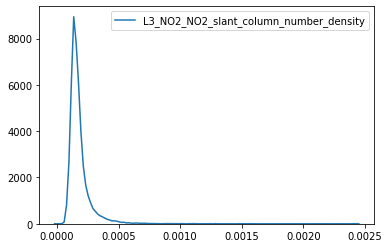

In [12]:
sns.kdeplot(train.L3_NO2_NO2_slant_column_number_density)

In [13]:
train.shape

(30557, 82)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
Place_ID X Date                                        30557 non-null object
Date                                                   30557 non-null object
Place_ID                                               30557 non-null object
target                                                 30557 non-null float64
target_min                                             30557 non-null float64
target_max                                             30557 non-null float64
target_variance                                        30557 non-null float64
target_count                                           30557 non-null int64
precipitable_water_entire_atmosphere                   30557 non-null float64
relative_humidity_2m_above_ground                      30557 non-null float64
specific_humidity_2m_above_ground                      30557 non-null float64
temperature_2m_above_ground           

In [15]:
train.describe()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
count,30557.000000,30557.000000,30557.000000,3.055700e+04,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,...,23320.000000,23320.000000,23320.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000
mean,61.148045,29.025866,117.992234,7.983756e+03,125.831135,15.302326,70.552747,0.006004,9.321342,0.416886,...,35.590916,-123.697777,46.533951,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
std,46.861309,33.119775,100.417713,4.863090e+04,146.581856,10.688573,18.807884,0.003787,9.343226,2.707990,...,18.955228,71.916036,14.594267,929.633988,1741.299304,0.027016,55.101250,18.004375,84.702355,24.786350
min,1.000000,1.000000,1.000000,0.000000e+00,2.000000,0.420044,5.128572,0.000139,-34.647879,-15.559646,...,0.000000,-179.880630,0.000000,0.000000,0.000000,0.000000,-105.367363,0.000000,-179.947422,0.000000
25%,25.000000,5.000000,60.000000,1.064920e+03,44.000000,7.666667,58.600002,0.003403,3.123071,-1.097864,...,19.451524,-165.882624,36.693094,0.000000,0.000000,0.000000,0.000000,0.000000,-161.726937,0.000000
50%,50.000000,15.000000,91.000000,2.395350e+03,72.000000,12.200000,74.099998,0.004912,8.478424,0.222092,...,37.918838,-156.637162,47.445010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,44.000000,155.000000,5.882550e+03,150.000000,19.900000,85.450001,0.007562,16.201563,1.772925,...,52.270055,-118.453598,57.438181,1861.674119,3393.541633,0.023829,62.245728,27.412303,0.000000,47.090635
max,815.000000,438.000000,999.000000,1.841490e+06,1552.000000,72.599998,100.000000,0.021615,37.437921,17.955124,...,66.111289,179.776125,79.631711,2112.522949,6478.550544,0.210483,77.355232,59.972710,179.813344,69.992363


In [16]:
test.head()

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,...,1.445658,-95.984984,22.942019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,...,34.641758,-95.014908,18.539116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,...,55.872276,-94.015418,14.140820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0OS9LVX X 2020-01-05,2020-01-05,0OS9LVX,15.011948,53.100002,0.00709,14.441858,5.454001,-0.190532,0.000055,...,59.174188,-97.247602,32.730553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0OS9LVX X 2020-01-06,2020-01-06,0OS9LVX,9.700000,71.599998,0.00808,11.896295,3.511787,-0.279441,0.000055,...,40.925873,-96.057265,28.320527,1831.261597,3229.118652,0.031068,-100.278343,41.84708,-95.910744,28.498789


In [17]:
#target columns 
for i in train.columns:
    if i not in test.columns:
        print (i)

target
target_min
target_max
target_variance
target_count


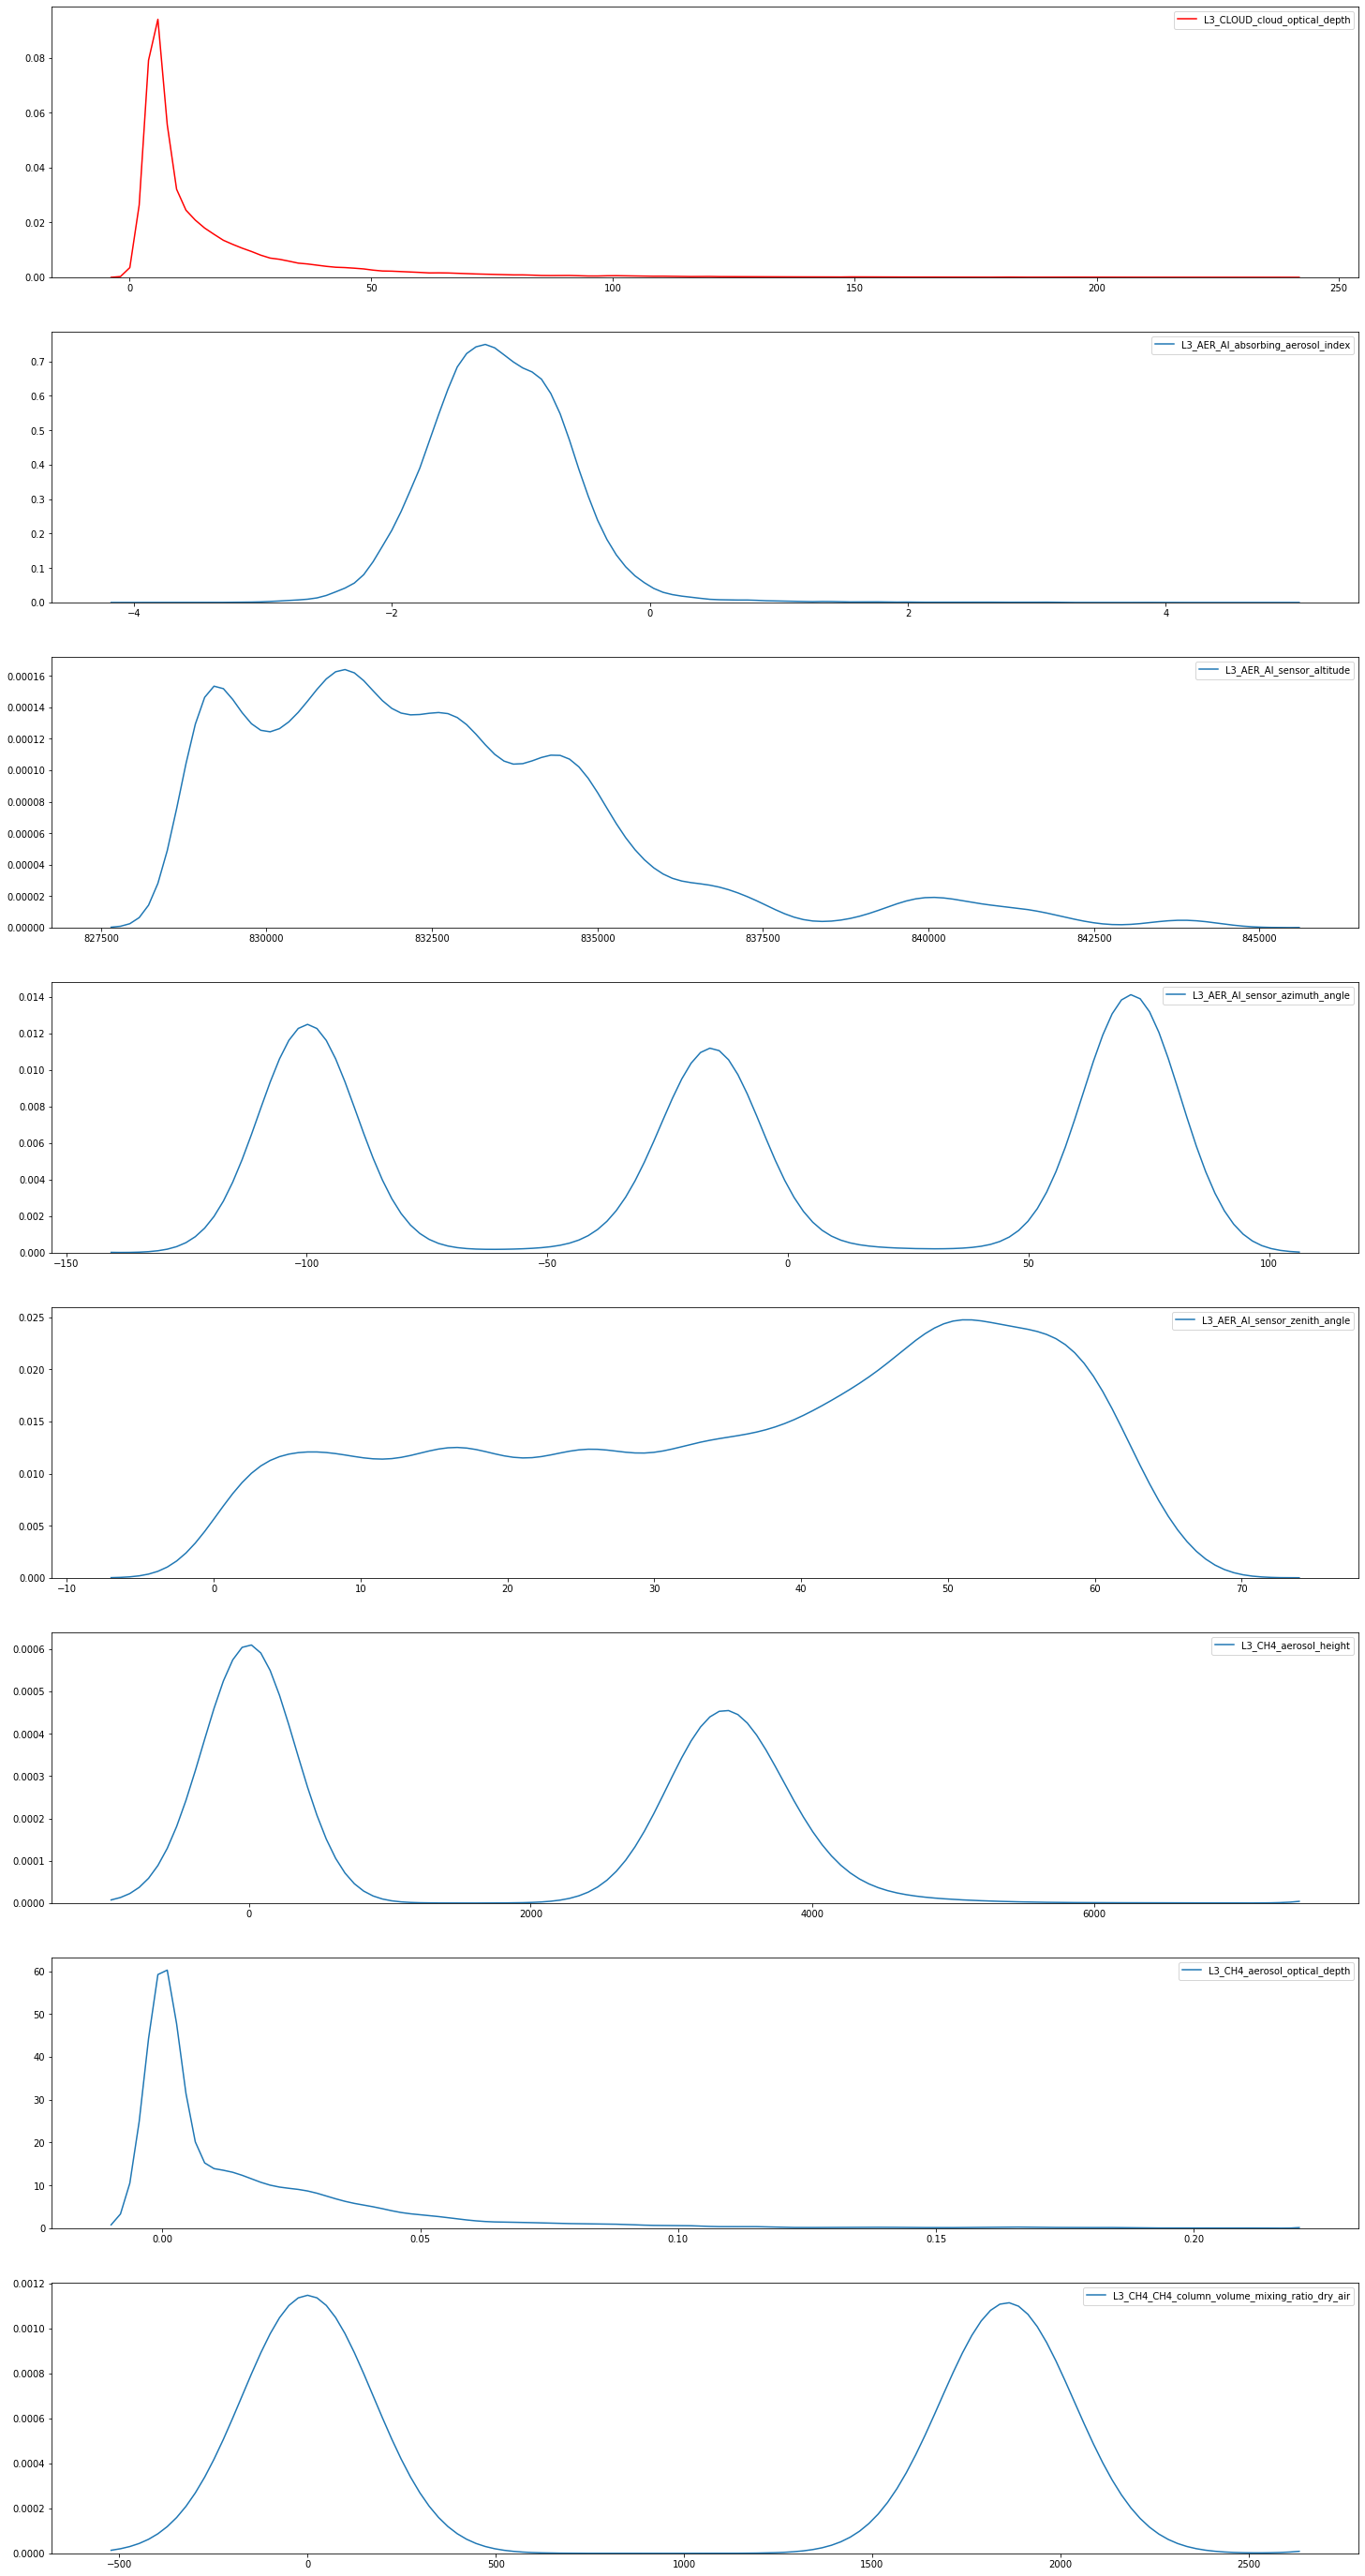

In [18]:
f, axes = plt.subplots(8, 1, figsize=[25, 50],)

sns.kdeplot(train.L3_CLOUD_cloud_optical_depth, ax=axes[0], color='red')
sns.kdeplot(train.L3_AER_AI_absorbing_aerosol_index, ax=axes[1])
sns.kdeplot(train.L3_AER_AI_sensor_altitude, ax=axes[2])
sns.kdeplot(train.L3_AER_AI_sensor_azimuth_angle, ax=axes[3])
sns.kdeplot(train.L3_AER_AI_sensor_zenith_angle, ax=axes[4])
sns.kdeplot(train.L3_CH4_aerosol_height, ax=axes[5])
sns.kdeplot(train.L3_CH4_aerosol_optical_depth, ax=axes[6])
sns.kdeplot(train.L3_CH4_CH4_column_volume_mixing_ratio_dry_air, ax=axes[7])


In [19]:
num_col=[]
cat_col=[]
for i in train.columns:
    if train[i].dtypes =='O':
        cat_col.append(i)
    else:
        num_col.append(i)

In [20]:
train_new=traind[num_col]

In [21]:
train_new.L3_CH4_aerosol_height

0        3227.855469
1        3384.226562
2                NaN
3                NaN
4                NaN
            ...     
30551            NaN
30552            NaN
30553    3475.020107
30554            NaN
30555            NaN
Name: L3_CH4_aerosol_height, Length: 26982, dtype: float64

In [22]:
train_drop=train_new[['precipitable_water_entire_atmosphere',
        'relative_humidity_2m_above_ground',
        'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
        'u_component_of_wind_10m_above_ground',
        'v_component_of_wind_10m_above_ground',
        'L3_NO2_NO2_column_number_density',
        'L3_NO2_NO2_slant_column_number_density',
        'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
'L3_NO2_sensor_altitude',
'L3_NO2_stratospheric_NO2_column_number_density',
 'L3_NO2_tropopause_pressure',       'L3_NO2_tropospheric_NO2_column_number_density',
        'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
        'L3_O3_cloud_fraction',
        'L3_O3_solar_zenith_angle', 'L3_CO_CO_column_number_density',
        'L3_CO_H2O_column_number_density', 'L3_CO_cloud_height',
        'L3_CO_solar_zenith_angle', 'L3_HCHO_HCHO_slant_column_number_density',
        'L3_HCHO_cloud_fraction',
        'L3_HCHO_solar_zenith_angle',
'L3_HCHO_tropospheric_HCHO_column_number_density',
        'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
        'L3_CLOUD_cloud_base_height', 'L3_CLOUD_cloud_base_pressure',
        'L3_CLOUD_cloud_fraction', 'L3_CLOUD_cloud_optical_depth',
        'L3_CLOUD_cloud_top_height', 'L3_CLOUD_cloud_top_pressure',
        'L3_CLOUD_surface_albedo', 'L3_AER_AI_absorbing_aerosol_index',
        'L3_AER_AI_solar_zenith_angle', 'L3_SO2_SO2_column_number_density',
        'L3_SO2_SO2_column_number_density_amf',
        'L3_SO2_SO2_slant_column_number_density',
        'L3_SO2_absorbing_aerosol_index', 'L3_SO2_cloud_fraction']]
colz=[train_drop.columns]

In [23]:
#colz

In [24]:
train_drop.shape

(26982, 41)

In [25]:
from sklearn.preprocessing import Imputer

In [26]:
imr=Imputer(missing_values='NaN', strategy='mean', axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [27]:
imr=imr.fit(train_drop)

In [28]:
train_data=imr.transform(train_drop)

In [29]:
train_drop.shape

(26982, 41)

In [30]:
train_data.shape

(26982, 41)

In [31]:
#train_data=pd.DataFrame(train_data, columns=colz)

In [32]:
X=train_data
y=traind['target']

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [34]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [35]:
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=101)

In [36]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [37]:
rfc_train=X_train
rfc_test=X_test

xgb_train=X_train
xgb_test=X_test

In [38]:
rfc=RandomForestRegressor(oob_score=True,n_jobs=-1,min_samples_leaf=5,n_estimators=100, max_features=0.5)
xgb=XGBRegressor(objective='reg:squarederror', oob_score=True, n_jobs=-1, n_estimators=100, max_features=0.5)

In [39]:
rfc.fit(rfc_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [40]:
xgb.fit(xgb_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, max_features=0.5, min_child_weight=1, missing=None,
             n_estimators=100, n_jobs=-1, nthread=None,
             objective='reg:squarederror', oob_score=True, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [41]:
rfc_pred=rfc.predict(rfc_test)
xgb_pred=xgb.predict(xgb_test)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [43]:
print(mean_absolute_error(y_test, xgb_pred))
print(mean_squared_error(y_test, xgb_pred))
print(np.sqrt(mean_squared_error(y_test, xgb_pred)))

print('+'*30)

print(mean_absolute_error(y_test, rfc_pred))
print(mean_squared_error(y_test, rfc_pred))
print(np.sqrt(mean_squared_error(y_test, rfc_pred)))

22.966790613934624
1072.3046181062066
32.74606263516588
++++++++++++++++++++++++++++++
20.001955184515268
876.2265598402907
29.601124300274318


In [47]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

param = {'num_leaves': 100,
         'min_data_in_leaf': 50, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.075,
         "boosting": "gbdt",
         "feature_fraction": 0.35,
         "metric": 'auc',
         "lambda_l1": 1,
         "lambda_l2": 2,
         "random_state": 6,
         "verbosity": -1,
          'metric' : 'rmse',
          'num_iterations': 1500,'n_estimators':1000}

clf = lgb.train(params=param, 
                early_stopping_rounds=100,
                verbose_eval=100,
                train_set=train_data,
                valid_sets=[test_data])

y_pred = clf.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 28.6274
[200]	valid_0's rmse: 27.7259
[300]	valid_0's rmse: 27.4301
[400]	valid_0's rmse: 27.2427
[500]	valid_0's rmse: 27.1615
[600]	valid_0's rmse: 27.1213
[700]	valid_0's rmse: 27.097
[800]	valid_0's rmse: 27.0876
[900]	valid_0's rmse: 27.068
[1000]	valid_0's rmse: 27.0527
Early stopping, best iteration is:
[989]	valid_0's rmse: 27.0493
RMSE:  27.04933302282362


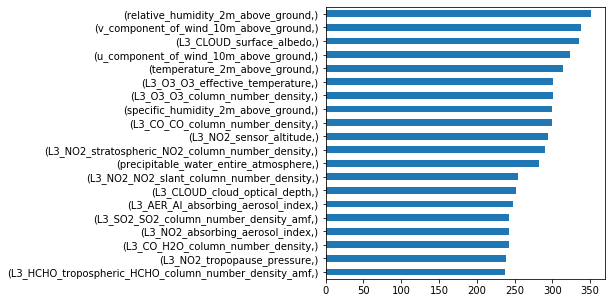

In [88]:
_ = plt.figure(figsize=(5,5))
fi = pd.Series(index=colz, data=(clf.feature_importance()/10))
_ = fi.sort_values()[-20:].plot(kind='barh')

In [75]:
for i in colz:
    for j in clf.feature_importance
clf.feature_importance()

array([2820, 3515, 3001, 3135, 3230, 3376, 2351, 2539, 2424, 2141, 2940,
       2908, 2386, 1764, 3010, 3010, 1666, 2080, 2998, 2423, 2357, 1790,
       2090, 1673, 1550, 2044, 2370, 2331, 2120, 1877, 2518, 1992, 1787,
       3354, 2479, 1838, 2073, 2433, 1972, 2083, 1463])

In [48]:
test_num=[]
test_cat=[]
for i in test.columns:
    if test[i].dtypes =='O':
        test_cat.append(i)
    else:
        test_num.append(i)

In [49]:
test_drop=test[test_num]

In [50]:
test_drop=test_drop[['precipitable_water_entire_atmosphere',
        'relative_humidity_2m_above_ground',
        'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
        'u_component_of_wind_10m_above_ground',
        'v_component_of_wind_10m_above_ground',
        'L3_NO2_NO2_column_number_density',
        'L3_NO2_NO2_slant_column_number_density',
        'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
        'L3_NO2_sensor_altitude',
        'L3_NO2_stratospheric_NO2_column_number_density',
        'L3_NO2_tropopause_pressure',
        'L3_NO2_tropospheric_NO2_column_number_density',
        'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
        'L3_O3_cloud_fraction', 'L3_O3_solar_zenith_angle',
        'L3_CO_CO_column_number_density', 'L3_CO_H2O_column_number_density',
        'L3_CO_cloud_height', 'L3_CO_solar_zenith_angle',
        'L3_HCHO_HCHO_slant_column_number_density', 'L3_HCHO_cloud_fraction',
        'L3_HCHO_solar_zenith_angle',
        'L3_HCHO_tropospheric_HCHO_column_number_density',
        'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
        'L3_CLOUD_cloud_base_height', 'L3_CLOUD_cloud_base_pressure',
        'L3_CLOUD_cloud_fraction', 'L3_CLOUD_cloud_optical_depth',
        'L3_CLOUD_cloud_top_height', 'L3_CLOUD_cloud_top_pressure',
        'L3_CLOUD_surface_albedo', 'L3_AER_AI_absorbing_aerosol_index',
        'L3_AER_AI_solar_zenith_angle', 'L3_SO2_SO2_column_number_density',
        'L3_SO2_SO2_column_number_density_amf',
        'L3_SO2_SO2_slant_column_number_density',
        'L3_SO2_absorbing_aerosol_index', 'L3_SO2_cloud_fraction']]

In [51]:
imr=imr.fit(test_drop)
test_data=imr.transform(test_drop)

In [52]:
test_data=sc.transform(test_data)

In [54]:
xgb_pred_test=clf.predict(test_data)

In [56]:
xgb_pred_test_1=np.round(xgb_pred_test)

In [57]:
sample=submission.copy()

In [67]:
sample['target']=xgb_pred_test_1

In [68]:
sample.to_csv('lgbm_1.csv', index=False)

In [69]:
sample.target

0        75.0
1        31.0
2        42.0
3        45.0
4        37.0
         ... 
16131    47.0
16132    56.0
16133    40.0
16134    47.0
16135    46.0
Name: target, Length: 16136, dtype: float64